In [13]:
mxb_to_rmb = 56
GROVE_ATTACK_PRICE = {
    "10": 1500,
    "11": 2500,
    "12": 5000,
    "13": 14000,
    "14": 41000,
    "15": 2200*mxb_to_rmb,
    "16": 6000*mxb_to_rmb,
}

In [14]:
GROVE_ATTACK_PRICE.values()

dict_values([1500, 2500, 5000, 14000, 41000, 123200, 336000])

a = 0.027768 ± 0.007479
b = 1.019462 ± 0.016797
c = -490.428279 ± 1139.813104
R^2 = 0.9998


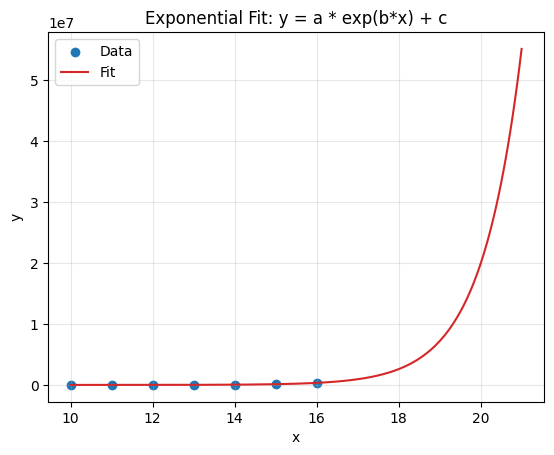

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 1) 准备你的数据（示例）
x = np.array(list(GROVE_ATTACK_PRICE.keys()),dtype=int)
y = np.array(list(GROVE_ATTACK_PRICE.values()),dtype=int)

# 2) 定义指数模型：y = a * exp(b*x) + c
def exp_model(x, a, b, c):
    return a * np.exp(b * x) + c

# 3) 给初始猜测（很关键），可根据数据粗略估计
p0 = [1.0, 0.5, 0.0]  # a, b, c 的初猜

# 4) 拟合
popt, pcov = curve_fit(exp_model, x, y, p0=p0, maxfev=10000)
a, b, c = popt
perr = np.sqrt(np.diag(pcov))  # 参数标准差（不完全等同置信区间）

print(f"a = {a:.6f} ± {perr[0]:.6f}")
print(f"b = {b:.6f} ± {perr[1]:.6f}")
print(f"c = {c:.6f} ± {perr[2]:.6f}")

# 5) 评估拟合：R^2
y_pred = exp_model(x, *popt)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - np.mean(y))**2)
r2 = 1 - ss_res/ss_tot
print(f"R^2 = {r2:.4f}")

# 6) 可视化
x_fit = np.arange(np.min(x), 21+1, 1)
y_fit = exp_model(x_fit, *popt)

plt.scatter(x, y, label="Data", color="tab:blue")
plt.plot(x_fit, y_fit, label="Fit", color="tab:red")
plt.title("Exponential Fit: y = a * exp(b*x) + c")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [19]:
y_fit[x_fit == 18]

array([], dtype=float64)